# Load Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from pandas import datetime
%matplotlib inline
%config IPCompleter.greedy=True

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from scipy.stats import shapiro
import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [0]:
import io
def parser(x):
  return datetime.strptime(x, '%Y-%m-%d')
weather_df = pd.read_csv(io.BytesIO(uploaded['weatherAUS.csv']), parse_dates=[0], date_parser=parser)

# EDA and Data Cleansing (Null Values)

In [0]:
len(weather_df)

142193

In [0]:
weather_df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


In [0]:
weather_df.drop('RISK_MM', axis=1, inplace=True)

In [0]:
weather_df.tail(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [0]:
#Date The date of observation (Y/M/D)
#Location The common name of the location of the weather station (see in google maps)
#MinTemp The minimum temperature in degrees celsius
#MaxTemp The maximum temperature in degrees celsius
#Rainfall The amount of rainfall recorded for the day in mm
#Evaporation The so-called Class A pan evaporation (mm) in the 24 hours to 9am (rate of evaporation in a pan)
#Sunshine The number of hours of bright sunshine in the day. (why there are NAN values?)
#WindGustDir The direction of the STRONGEST wind gust in the 24 hours to midnight
#WindGustSpeed The speed (km/h) of the STRONGEST wind gust in the 24 hours to midnight
#WindDir9am Direction of the wind at 9am
#WindDir3pm Direction of the wind at 3pm
#WindSpeed9am Wind speed (km/hr) averaged over 10 minutes prior to 9am
#WindSpeed3pm Wind speed (km/hr) averaged over 10 minutes prior to 3pm
#Humidity9am Humidity (percent) at 9am
#Humidity3pm Humidity (percent) at 3pm
#Pressure9am Atmospheric pressure (hpa) reduced to mean sea level at 9am
#Pressure3pm Atmospheric pressure (hpa) reduced to mean sea level at 3pm
#Cloud9am Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. 
  #It records how many eigths of the sky are obscured by cloud.
   #A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
#Cloud3pm Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
#Temp9am Temperature (degrees C) at 9am
#Temp3pm Temperature (degrees C) at 3pm
#RainToday Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
#RISK_MMThe amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk". (NOT USED)
#RainTomorrowThe target variable. Did it rain tomorrow? (LABEL TO PREDICT)

In [0]:
weather_df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [0]:
print(f'quantity of nulls overall{weather_df.isna().sum()/len(weather_df)}')

quantity of nulls overallDate             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RainTomorrow     0.000000
dtype: float64


Evaporation + Sunshine + Cloud 9 am + Cloud 3 pm have more than 40% of null values

In [0]:
weather_df = weather_df[weather_df.isnull().sum(axis=1) < 4]

In [0]:
len(weather_df)

94829

In [0]:
print(f'quantity of nulls overall{weather_df.isna().sum()}')

quantity of nulls overallDate                 0
Location             0
MinTemp             61
MaxTemp             28
Rainfall           119
Evaporation      16105
Sunshine         21570
WindGustDir       3932
WindGustSpeed     3921
WindDir9am        2982
WindDir3pm         317
WindSpeed9am        33
WindSpeed3pm        14
Humidity9am        237
Humidity3pm        224
Pressure9am        116
Pressure3pm         68
Cloud9am         12157
Cloud3pm         13578
Temp9am             68
Temp3pm             15
RainToday          119
RainTomorrow         0
dtype: int64


In [0]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,94768.000000,94801.000000,94710.000000,78724.000000,73259.000000,90908.000000,94796.000000,94815.000000,94592.000000,94605.000000,94713.000000,94761.000000,82672.000000,81251.000000,94761.000000,94814.000000
mean,12.728981,23.535457,2.426156,5.465916,7.640769,40.704382,14.984018,19.410547,67.763416,50.818752,1017.426988,1015.064744,4.427533,4.491132,17.392238,22.041270
std,6.383153,7.108156,8.850344,4.143064,3.778835,13.455943,8.620794,8.583527,19.153290,20.775513,7.083357,7.030153,2.876435,2.716134,6.535227,6.963322
min,-8.000000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-1.300000,1.700000
25%,8.000000,18.000000,0.000000,2.600000,4.900000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.700000,1010.300000,1.000000,2.000000,12.400000,16.700000
50%,12.400000,22.900000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.400000,1015.000000,5.000000,5.000000,16.900000,21.400000
75%,17.400000,28.800000,0.800000,7.400000,10.700000,48.000000,20.000000,24.000000,82.000000,65.000000,1022.200000,1019.800000,7.000000,7.000000,22.200000,27.100000
max,33.900000,48.100000,371.000000,82.400000,14.500000,135.000000,69.000000,76.000000,100.000000,100.000000,1040.900000,1038.900000,9.000000,9.000000,40.200000,46.700000


In [0]:
weather_df_SunshineAnal  = weather_df.query('Sunshine > 8.5')
weather_df_SunshineAnal.head()

#weather_df.query('Sunshine == "NaN"')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,17.0,19.0,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,No


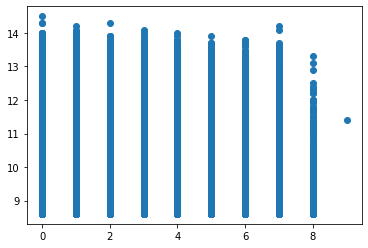

In [0]:
plt.scatter(x='Cloud3pm', y='Sunshine', data=weather_df_SunshineAnal)

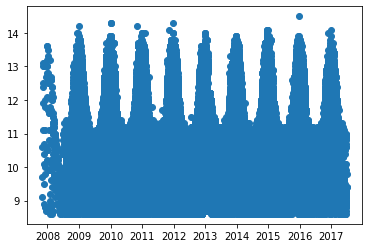

In [0]:
plt.scatter(x='Date', y='Sunshine', data=weather_df_SunshineAnal)

Conseguimos verificar que as horas de sunshine tem a ver com a altura do ano e não com a influencia das nuvens. Sendo assim não apresenta uma correlação direta com a chuva no dia a seguir. Vamos eliminar esta coluna

In [0]:
weather_df.drop('Sunshine', axis=1, inplace=True)

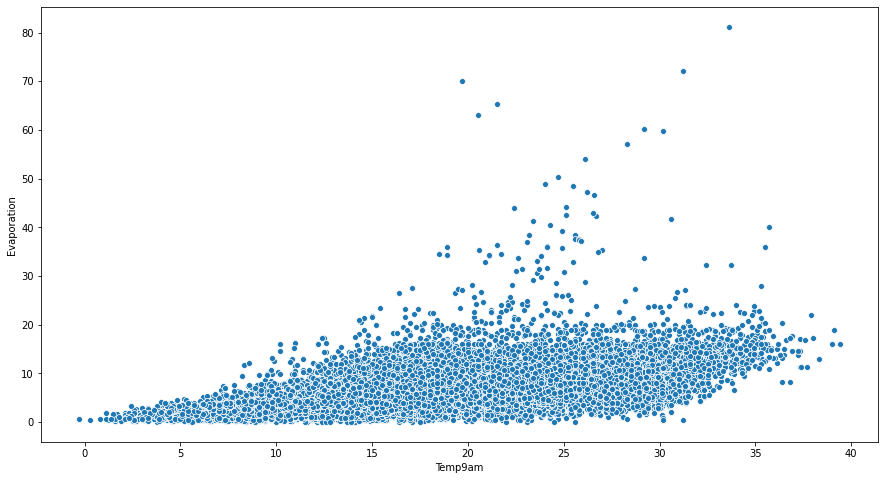

In [0]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="Temp9am", y="Evaporation",
                     data=weather_df_SunshineAnal)

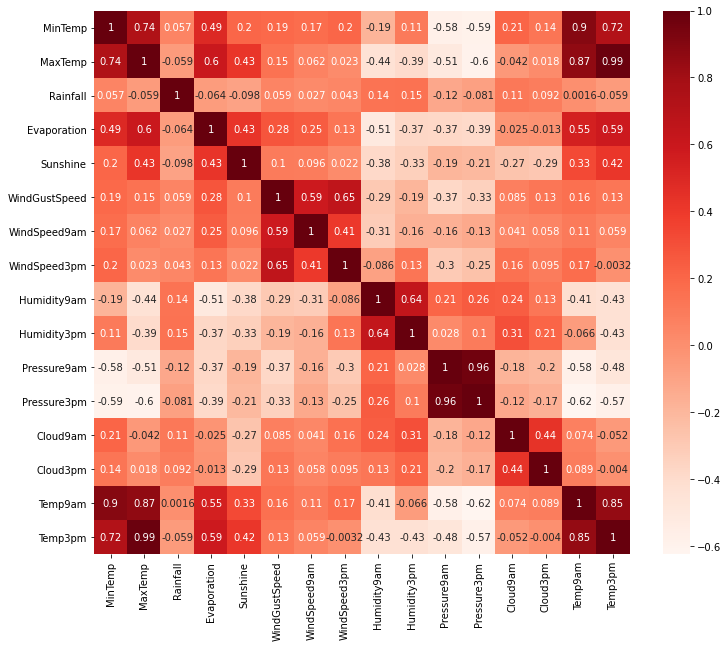

In [0]:
plt.figure(figsize=(12,10))
cor = weather_df_SunshineAnal.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Vemos uma correlação de 55% (juntamente com o heatmap) entre a temp9am e a evaporation. Vamos assumir então que se a temperatura for maior que 10, a evaporation tomará valores de 7.4. Menor que isso (<= 9) terá valores medianos na casa dos 4.8 (mediana) Menor que 5 terá valores de 2.5

In [0]:
weather_df.loc[(weather_df['Evaporation'].isnull()) & (weather_df['Temp9am'] >= 10), 'Evaporation'] = 7.4
weather_df.loc[(weather_df['Evaporation'].isnull()) & (weather_df['Temp9am'] <= 5 ), 'Evaporation'] = 2.5
weather_df.loc[(weather_df['Evaporation'].isnull()) & (weather_df['Temp9am'] >= 5 ), 'Evaporation'] = 4.8
weather_df.isna().sum()

Date                 0
Location             0
MinTemp             61
MaxTemp             28
Rainfall           119
Evaporation          0
WindGustDir       3932
WindGustSpeed     3921
WindDir9am        2982
WindDir3pm         317
WindSpeed9am        33
WindSpeed3pm        14
Humidity9am        237
Humidity3pm        224
Pressure9am        116
Pressure3pm         68
Cloud9am         12157
Cloud3pm         13578
Temp9am             68
Temp3pm             15
RainToday          119
RainTomorrow         0
dtype: int64

In [0]:
weather_df['MinTemp'].fillna(weather_df.MinTemp.median(), inplace=True)

In [0]:
weather_df['MaxTemp'].fillna(weather_df.MaxTemp.median(), inplace=True)
weather_df['WindGustSpeed'].fillna(weather_df.WindGustSpeed.median(), inplace=True)
weather_df['WindSpeed9am'].fillna(weather_df.WindSpeed9am.median(), inplace=True)
weather_df['WindSpeed3pm'].fillna(weather_df.WindSpeed3pm.median(), inplace=True)
weather_df['Humidity9am'].fillna(weather_df.Humidity9am.median(), inplace=True)
weather_df['Humidity3pm'].fillna(weather_df.Humidity3pm.median(), inplace=True)
weather_df['Pressure9am'].fillna(weather_df.Pressure9am.median(), inplace=True)
weather_df['Pressure3pm'].fillna(weather_df.Pressure3pm.median(), inplace=True)
weather_df['Temp9am'].fillna(weather_df.Temp9am.median(), inplace=True)
weather_df['Temp3pm'].fillna(weather_df.Temp3pm.median(), inplace=True)

In [0]:
weather_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall           119
Evaporation          0
WindGustDir       3932
WindGustSpeed        0
WindDir9am        2982
WindDir3pm         317
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         12157
Cloud3pm         13578
Temp9am              0
Temp3pm              0
RainToday          119
RainTomorrow         0
dtype: int64

In [0]:
weather_df_RainTodayAnal  = weather_df.loc[(weather_df['RainToday'].isnull())]
weather_df_RainTodayAnal.head(2)
#o Rain Today e o Rainfall têm valores NAN nas mesmas linhas. Vamos assumir como 0 no Rainfall in mm e NO como RainToday 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7332,2012-11-30,Cobar,27.3,43.1,NaN,14.2,SW,50.0,NNW,WNW,19.0,17.0,21.0,12.0,1011.5,1008.5,6.0,6.0,35.1,42.2,NaN,No
9016,2009-04-01,CoffsHarbour,18.3,24.0,NaN,7.4,E,61.0,ESE,E,33.0,35.0,85.0,84.0,1014.3,1014.1,8.0,8.0,22.5,23.4,NaN,Yes


In [0]:
weather_df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [0]:
weather_df['RainToday'].fillna(0, inplace=True)
weather_df['Rainfall'].fillna(0, inplace=True)

In [0]:
weather_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
WindGustDir       3932
WindGustSpeed        0
WindDir9am        2982
WindDir3pm         317
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         12157
Cloud3pm         13578
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [0]:
weather_df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

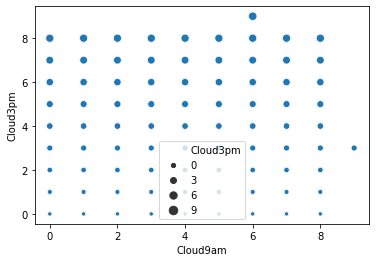

In [0]:
sns.scatterplot(x='Cloud9am', y='Cloud3pm', size='Cloud3pm', data=weather_df)

In [0]:
weather_df_CloudAnal  = weather_df.loc[(weather_df['Cloud9am'].isnull())]
weather_df_CloudAnal.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2,2008-12-03,Albury,12.9,25.7,0.0,7.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
13,2008-12-14,Albury,12.6,21.0,3.6,7.4,SW,44.0,W,SSW,24.0,20.0,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,No


In [0]:
weather_df.loc[(weather_df['Cloud9am'].isnull()) & (weather_df['Cloud3pm'] >= 5), 'Cloud9am'] = 7
weather_df.loc[(weather_df['Cloud9am'].isnull()) & (weather_df['Cloud3pm'] <= 4), 'Cloud9am'] = weather_df.Cloud9am.median()

In [0]:
weather_df.loc[(weather_df['Cloud3pm'].isnull()) & (weather_df['Cloud9am'] >= 5), 'Cloud3pm'] = 7
weather_df.loc[(weather_df['Cloud3pm'].isnull()) & (weather_df['Cloud9am'] <= 4), 'Cloud3pm'] = weather_df.Cloud3pm.median()

In [0]:
weather_df['Cloud3pm'].fillna(weather_df.Cloud3pm.median(), inplace=True)
weather_df['Cloud9am'].fillna(weather_df.Cloud9am.median(), inplace=True)

In [0]:
weather_df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
WindGustDir      3932
WindGustSpeed       0
WindDir9am       2982
WindDir3pm        317
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [0]:
wind3pm_df = weather_df.WindDir3pm.value_counts()
wind3pm_df = pd.DataFrame(wind3pm_df)

In [0]:
wind9am_df = weather_df.WindDir9am.value_counts()
wind9am_df = pd.DataFrame(wind9am_df)
wind9am_df.reset_index(inplace=True)

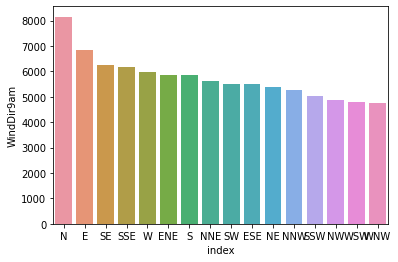

In [0]:
ax = sns.barplot(x="index", y="WindDir9am", data=wind9am_df)

In [0]:
weather_df_WindDirAnal  = weather_df.loc[(weather_df['WindDir3pm'].isnull())]
weather_df_WindDirAnal.head(2)
#WindGustDir tem a mesma direção Geral (N S W E) que o WindDir3pm

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
186,2009-06-06,Albury,1.7,10.5,0.2,2.5,ESE,11.0,E,NaN,4.0,0.0,99.0,91.0,1015.2,1011.1,8.0,8.0,4.7,10.2,No,Yes
359,2009-11-27,Albury,15.9,26.2,10.2,7.4,N,24.0,NE,NaN,11.0,0.0,82.0,56.0,1010.7,1008.6,7.0,5.0,17.6,24.7,Yes,No


In [0]:
weather_df['WindDir3pm'].fillna(weather_df.WindGustDir, inplace=True)

In [0]:
weather_df['WindDir3pm'].fillna(weather_df.WindDir3pm.mode()[0], inplace=True)
weather_df['WindDir9am'].fillna(weather_df.WindDir9am.mode()[0], inplace=True)
weather_df['WindGustDir'].fillna(weather_df.WindGustDir.mode()[0], inplace=True)

In [0]:
weather_df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Agora é necessário transformar os dados contínuos em Z-score para eliminar os outliers. 

# Feature Engineering

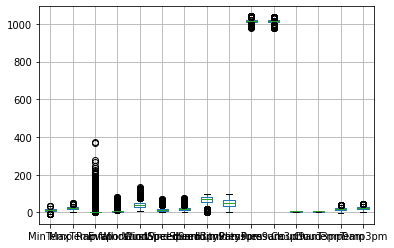

In [0]:
weather_df.boxplot()

In [0]:
from scipy import stats
def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, result_type='reduce') \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

#create a function to transform only numerical data into z score and removing all the rows  

In [0]:
drop_numerical_outliers(weather_df)

In [0]:
print(f'length after zscore outliers: {len(weather_df)}')

length after zscore outliers: 89810


In [0]:
weather_df.describe(include="all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,89810,89810,89810.000000,89810.000000,89810.000000,89810.000000,89810,89810.000000,89810,89810,89810.000000,89810.000000,89810.000000,89810.000000,89810.000000,89810.000000,89810.000000,89810.000000,89810.000000,89810.000000,89810,89810
unique,3432,38,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,2009-06-09 00:00:00,Perth,NaN,NaN,NaN,NaN,W,NaN,N,SW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,36,3159,NaN,NaN,NaN,NaN,10221,NaN,10217,6762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70383,70512
first,2007-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.579700,23.445802,1.529948,5.451510,NaN,39.604387,NaN,NaN,14.453969,18.980192,67.994099,50.733482,1017.798813,1015.408008,4.494544,4.571907,17.265364,21.974808,NaN,NaN
std,NaN,NaN,6.369088,7.005881,3.973486,3.098553,NaN,11.818017,NaN,NaN,7.937408,8.060110,18.619762,20.318449,6.785717,6.767895,2.707673,2.548098,6.486900,6.856951,NaN,NaN
min,NaN,NaN,-6.300000,4.100000,0.000000,0.000000,NaN,7.000000,NaN,NaN,0.000000,0.000000,11.000000,0.000000,996.200000,994.000000,0.000000,0.000000,-1.300000,3.200000,NaN,NaN
25%,NaN,NaN,7.900000,18.000000,0.000000,3.000000,NaN,31.000000,NaN,NaN,9.000000,13.000000,56.000000,36.000000,1013.100000,1010.600000,2.000000,2.000000,12.300000,16.700000,NaN,NaN


In [0]:
weather_df['day'] = weather_df['Date'].dt.day
weather_df['month'] = weather_df['Date'].dt.month
weather_df['year'] = weather_df['Date'].dt.year

In [0]:
weather_df.drop('Date', axis=1, inplace=True)

In [0]:
weather_df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,7.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,1,12,2008
2,Albury,12.9,25.7,0.0,7.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,3,12,2008
4,Albury,17.5,32.3,1.0,7.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [0]:
weather_df.Location.unique()

array(['Albury', 'Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland',
       'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Ballarat', 'Bendigo', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Dartmoor', 'Brisbane', 'Cairns', 'Townsville', 'Adelaide',
       'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'PearceRAAF',
       'PerthAirport', 'Perth', 'Hobart', 'Launceston', 'AliceSprings',
       'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [0]:
weather_df.WindGustDir.unique()

array(['W', 'WSW', 'NNE', 'SW', 'ENE', 'SSE', 'NE', 'N', 'WNW', 'NW',
       'SE', 'NNW', 'ESE', 'E', 'SSW', 'S'], dtype=object)

In [0]:
weather_df.WindDir9am.unique()

array(['W', 'ENE', 'SW', 'NE', 'SSW', 'N', 'WSW', 'ESE', 'SE', 'WNW',
       'SSE', 'E', 'S', 'NW', 'NNW', 'NNE'], dtype=object)

In [0]:
weather_df.WindGustDir.replace({'W':'W', 'WSW':'W', 'NNE':'N', 'SW':'S', 'ENE':'E', 'SSE':'S', 'NE':'N', 'WNW':'W', 'NW':'N',
       'SE':'S', 'NNW':'N', 'ESE':'E', 'SSW':'S'}, inplace=True)

In [0]:
weather_df.WindDir3pm.replace({'W':'W', 'WSW':'W', 'NNE':'N', 'SW':'S', 'ENE':'E', 'SSE':'S', 'NE':'N', 'WNW':'W', 'NW':'N',
       'SE':'S', 'NNW':'N', 'ESE':'E', 'SSW':'S'}, inplace=True)

In [0]:
weather_df.WindDir9am.replace({'W':'W', 'WSW':'W', 'NNE':'N', 'SW':'S', 'ENE':'E', 'SSE':'S', 'NE':'N', 'WNW':'W', 'NW':'N',
       'SE':'S', 'NNW':'N', 'ESE':'E', 'SSW':'S'}, inplace=True)

In [0]:
weather_df.WindDir9am.unique()

array(['W', 'E', 'S', 'N'], dtype=object)

Text(0, 0.5, 'Qty')

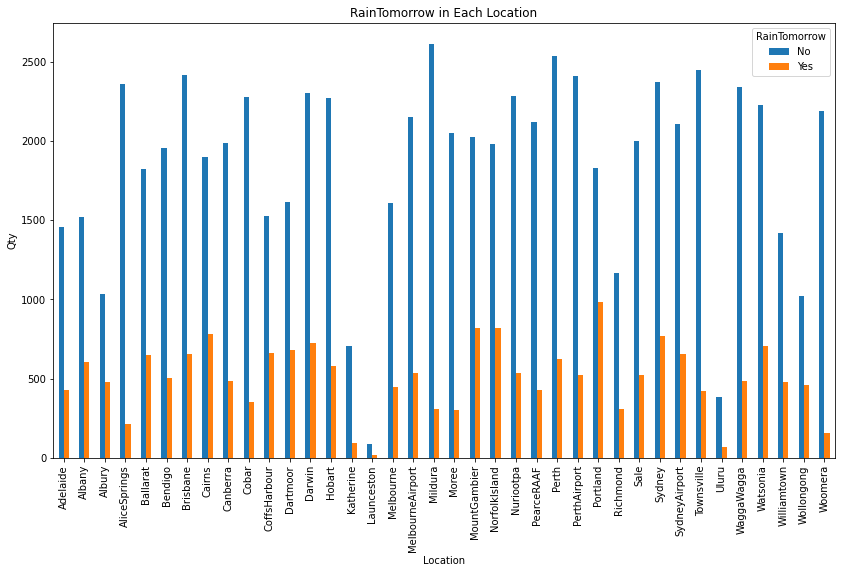

In [0]:
ax = weather_df.groupby(['RainTomorrow','Location'])['Location'].count().unstack(0).plot.bar(title="RainTomorrow in Each Location", figsize=(14,8))
ax.set_xlabel('Location')
ax.set_ylabel('Qty')

In [0]:
percentage_rainTomorrow = weather_df.groupby(['RainTomorrow','Location'])['Location'].count().unstack(0)
percentage_rainTomorrow['PercentageRain'] = (percentage_rainTomorrow.Yes/(percentage_rainTomorrow.Yes+percentage_rainTomorrow.No))*100

In [0]:
percentage_rainTomorrow.reset_index(inplace=True)

In [0]:
percentage_rainTomorrow.head()

RainTomorrow,Location,No,Yes,PercentageRain
0,Adelaide,1458,431,22.816305
1,Albany,1519,608,28.584861
2,Albury,1034,477,31.568498
3,AliceSprings,2362,217,8.414114
4,Ballarat,1820,651,26.345609


In [0]:
percentage_rainTomorrow.sort_values('PercentageRain', inplace=True)
percentage_rainTomorrow.head(2)

RainTomorrow,Location,No,Yes,PercentageRain
37,Woomera,2186,158,6.740614
3,AliceSprings,2362,217,8.414114


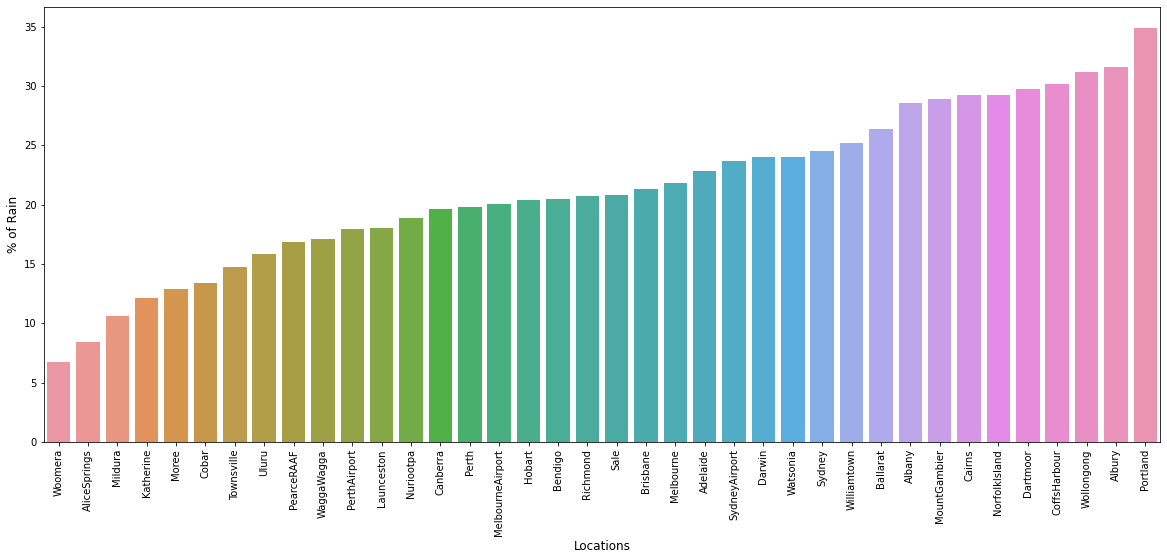

In [0]:
plt.figure(figsize=(20,8))
sns.barplot(x='Location', y="PercentageRain", data=percentage_rainTomorrow)
plt.ylabel('% of Rain', fontsize=12)
plt.xlabel('Locations', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [0]:
weather_df.Location.unique()

array(['Albury', 'Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland',
       'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Ballarat', 'Bendigo', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Dartmoor', 'Brisbane', 'Cairns', 'Townsville', 'Adelaide',
       'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'PearceRAAF',
       'PerthAirport', 'Perth', 'Hobart', 'Launceston', 'AliceSprings',
       'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [0]:
weather_df.Location.replace({'Albury':'Vitoria', 'Cobar':'Australia Meridional', 'CoffsHarbour':'Nova Gales do Sul', 'Moree':'Nova Gales do Sul',
                               'NorfolkIsland':'Nova Gales do Sul', 'Richmond':'Nova Gales do Sul', 'Sydney':'Nova Gales do Sul', 
                               'SydneyAirport':'Nova Gales do Sul', 'WaggaWagga':'Nova Gales do Sul', 'Williamtown':'Vitoria',
                                'Wollongong':'Nova Gales do Sul', 'Canberra':'Nova Gales do Sul', 'Ballarat':'Vitoria', 'Bendigo':'Vitoria', 'Sale':'Vitoria',
                                'MelbourneAirport':'Vitoria', 'Melbourne':'Vitoria', 'Mildura':'Vitoria', 'Portland':'Vitoria', 'Watsonia':'Vitoria',
                                'Dartmoor':'Vitoria', 'Brisbane':'Queensland', 'Cairns':'Queensland', 'Townsville':'Queensland', 'Adelaide':'Australia Meridional',
                                'MountGambier':'Australia Meridional', 'Nuriootpa':'Australia Meridional', 'Woomera':'Australia Meridional',
                                'Albany':'Nova Gales do Sul', 'PearceRAAF':'Australia Ocidental',
                                'PerthAirport':'Australia Ocidental', 'Perth':'Australia Ocidental', 'Hobart':'Tasmânia', 'Launceston':'Tasmânia',
                                'AliceSprings':'Território do Norte',
                                'Darwin':'Território do Norte', 'Katherine':'Território do Norte', 'Uluru':'Território do Norte'}, inplace=True)

In [0]:
weather_df.Location.unique()

array(['Vitoria', 'Australia Meridional', 'Nova Gales do Sul',
       'Queensland', 'Australia Ocidental', 'Tasmânia',
       'Território do Norte'], dtype=object)

In [0]:
weather_df.RainToday.unique()

array(['No', 'Yes', 0], dtype=object)

In [0]:
weather_df.RainToday.replace(to_replace=0, value='No', inplace=True)

In [0]:
weather_dummy = pd.get_dummies(weather_df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [0]:
weather_dummy.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,day,month,year,Location_Australia Meridional,Location_Australia Ocidental,Location_Nova Gales do Sul,Location_Queensland,Location_Tasmânia,Location_Território do Norte,Location_Vitoria,WindGustDir_E,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,7.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,1,12,2008,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
2,12.9,25.7,0.0,7.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,3,12,2008,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,17.5,32.3,1.0,7.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,5,12,2008,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
6,14.3,25.0,0.0,7.4,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,No,7,12,2008,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
11,15.9,21.7,2.2,7.4,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,12,12,2008,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [0]:
weather_dummy.shape

(89810, 40)

# Feature Selection

In [0]:
#como a dataframe tem valores negativos o pearson chi2 não é possível calcular. sendo assim será calculado a ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = weather_dummy.drop(['RainTomorrow'], axis=1)
Y = weather_dummy['RainTomorrow']

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print 10 best features

                            Specs         Score
8                     Humidity3pm  21755.361277
12                       Cloud3pm  11444.188263
37                   RainToday_No   7905.421396
38                  RainToday_Yes   7905.421396
11                       Cloud9am   7784.041131
2                        Rainfall   6750.163262
7                     Humidity9am   6109.733079
9                     Pressure9am   5090.894407
10                    Pressure3pm   4228.542878
4                   WindGustSpeed   3901.950163
14                        Temp3pm   3382.467688
1                         MaxTemp   2252.588579
3                     Evaporation   1122.241743
30                   WindDir9am_N    818.266927
25                  WindGustDir_E    571.308066
29                   WindDir9am_E    559.805699
34                   WindDir3pm_N    452.640497
0                         MinTemp    444.630612
6                    WindSpeed3pm    412.010374
5                    WindSpeed9am    363

In [0]:
#vamos experimentar NN em 3 DataFrames diferentes
#1ª => Retirar colunas abaixo do score 100 (9 colunas)
#2ª => Retirar colunas abaixo do score 10 (4 colunas)
#3ª => Todas as colunas
weather_wt100 = weather_dummy.drop(['Temp9am', 'Location_Australia Meridional', 'Location_Nova Gales do Sul', 'Location_Australia Ocidental',
                                    'month', 'Location_Tasmânia', 'year', 'Location_Queensland', 'day'], axis=1) 
weather_wt10 = weather_dummy.drop(['Location_Tasmânia', 'year', 'Location_Queensland', 'day'], axis=1)
weather_all = weather_dummy

In [0]:
weather_wt100.shape

(89810, 31)

In [0]:
weather_wt10.shape

(89810, 36)

In [0]:
weather_all.shape

(89810, 40)

Train Test Split às 3 colunas para fazer robust scalar.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x100 = weather_wt100.drop(['RainTomorrow'], axis = 1)
y100 = weather_wt100['RainTomorrow']

In [0]:
x10 = weather_wt10.drop(['RainTomorrow'], axis = 1)
y10 = weather_wt10['RainTomorrow']

In [0]:
x = weather_all.drop(['RainTomorrow'], axis = 1)
y = weather_all['RainTomorrow']

In [0]:
x100_train, x100_test, y100_train, y100_test = train_test_split ( x100, y100 , test_size=0.2, random_state=42)
x10_train, x10_test, y10_train, y10_test = train_test_split ( x10, y10 , test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split ( x, y , test_size=0.2, random_state=42)

# Train Model with SVC

In [0]:
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [0]:
svc_model = LinearSVC()
svc_model.fit(x100_train, y100_train)
y100_pred_svc = svc_model.predict(x100_test)
print(accuracy_score(y100_test, y100_pred_svc))
print(confusion_matrix(y100_test, y100_pred_svc))
print(classification_report(y100_test,y100_pred_svc))

0.8419441042200201
[[12962  1270]
 [ 1569  2161]]
              precision    recall  f1-score   support

          No       0.89      0.91      0.90     14232
         Yes       0.63      0.58      0.60      3730

    accuracy                           0.84     17962
   macro avg       0.76      0.75      0.75     17962
weighted avg       0.84      0.84      0.84     17962



In [0]:
svc_model = LinearSVC()
svc_model.fit(x10_train, y10_train)
y10_pred_svc = svc_model.predict(x10_test)
print(accuracy_score(y10_test, y10_pred_svc))
print(confusion_matrix(y10_test, y10_pred_svc))
print(classification_report(y10_test,y10_pred_svc))

0.7594365883531901
[[10624  3608]
 [  713  3017]]
              precision    recall  f1-score   support

          No       0.94      0.75      0.83     14232
         Yes       0.46      0.81      0.58      3730

    accuracy                           0.76     17962
   macro avg       0.70      0.78      0.71     17962
weighted avg       0.84      0.76      0.78     17962



In [0]:
svc_model = LinearSVC()
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)
print(accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test,y_pred_svc))

0.8489589132613294
[[13709   523]
 [ 2190  1540]]
              precision    recall  f1-score   support

          No       0.86      0.96      0.91     14232
         Yes       0.75      0.41      0.53      3730

    accuracy                           0.85     17962
   macro avg       0.80      0.69      0.72     17962
weighted avg       0.84      0.85      0.83     17962



In [0]:
svc_model = LinearSVC()
svc_model_cvs = cross_val_score(svc_model, x, y, cv = 10, scoring='roc_auc')
print (svc_model_cvs)
print (svc_model_cvs.mean())

[0.88222747 0.81418578 0.84048917 0.84315215 0.86754762 0.87460993
 0.78443171 0.85613109 0.88658839 0.89204133]
0.8541404631444698


Com o algoritmo SVC() criamos um modelo com 85% de score usando a metrica ROC_AUC para todas as colunas x

# Neural Network (Keras)

Vamos utilizar NN com o API Keras

In [0]:
y100.replace({'No':0, 'Yes':1}, inplace=True)

In [0]:
y100_test.replace({'No':0, 'Yes':1}, inplace=True)

In [0]:
y100.head()

0     0
2     0
4     0
6     0
11    1
Name: RainTomorrow, dtype: int64

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
# perceber todas as linhas
# as first layer in a sequential model:
# The model expects rows of data with 8 variables (the input_dim=8 argument)
# The first hidden layer has 12 nodes and uses the relu activation function.
model = Sequential()
model.add(Dense(25, input_dim=30, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model.add(Dense(10, activation='softmax'))
     
#optmizer rmsprop adam sgb
#Train the model, iterating on the data in batches of 32 samples. se o epoch for alto comparativamente ao batch size, no inicio a loss será grande
history = model.fit(x100, y100, epochs=150, batch_size=100)
score_3hlayers = model.evaluate(x100_test, y100_test)
# save model and architecture to single file
model.save("RainAustralia.h5")

Epoch 1/150
89810/89810 [==============================] - 1s 14us/step - loss: 0.5663 - accuracy: 0.8010
Epoch 2/150
89810/89810 [==============================] - 1s 13us/step - loss: 0.3990 - accuracy: 0.8288
Epoch 3/150
89810/89810 [==============================] - 1s 13us/step - loss: 0.4042 - accuracy: 0.8280
Epoch 4/150
89810/89810 [==============================] - 1s 13us/step - loss: 0.3914 - accuracy: 0.8314
Epoch 5/150
89810/89810 [==============================] - 1s 13us/step - loss: 0.3960 - accuracy: 0.8295
Epoch 6/150
89810/89810 [==============================] - 1s 13us/step - loss: 0.3940 - accuracy: 0.8321
Epoch 7/150
89810/89810 [==============================] - 1s 13us/step - loss: 0.4010 - accuracy: 0.8276
Epoch 8/150
89810/89810 [==============================] - 1s 14us/step - loss: 0.3988 - accuracy: 0.8287
Epoch 9/150
89810/89810 [==============================] - 1s 13us/step - loss: 0.3911 - accuracy: 0.8317
Epoch 10/150
89810/89810 [====================

In [0]:
#the first result is loss, the seccond is accuracy
print(f'Score with 3 Hidden Layers and 1 DropOut of 20%: {score_3hlayers_1drop}')
print(f'O MELHOR => Score with 3 Hidden Layers: {score_3hlayers}')
print(f'Score with 2 Hidden Layers and 1 DropOut of 20%: {score_2hlayers_1drop}')
print(f'Score with 2 Hidden Layers: {score_2hlayers}')

Score with 3 Hidden Layers and 1 DropOut of 20%: [0.36723439758955645, 0.8456742167472839]
O MELHOR => Score with 3 Hidden Layers: [0.34431193424364914, 0.8499610424041748]
Score with 2 Hidden Layers and 1 DropOut of 20%: [0.35387999589545943, 0.8466762900352478]
Score with 2 Hidden Layers: [0.350685704256827, 0.8460082411766052]


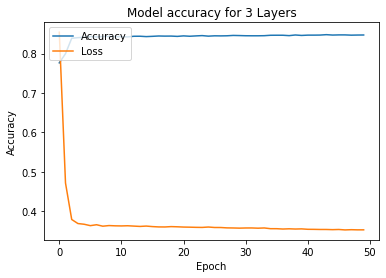

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy for 3 Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

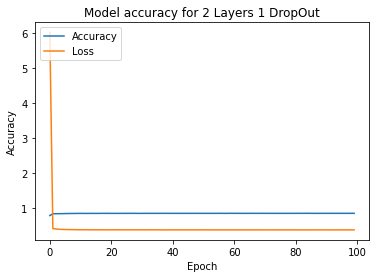

In [0]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('Model accuracy for 2 Layers 1 DropOut')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

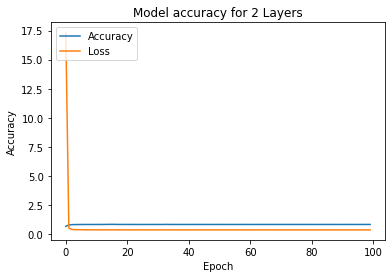

In [0]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['loss'])
plt.title('Model accuracy for 2 Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [0]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('RainAustralia.h5')
# summarize model.
model.summary()
# load dataset

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 1,046
Trainable params: 1,046
Non-trainable params: 0
_________________________________________________________________
